In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv('processed_tweet_data.csv')

In [ ]:
cleanTweet = Data[['original_text','polarity']]

In [ ]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

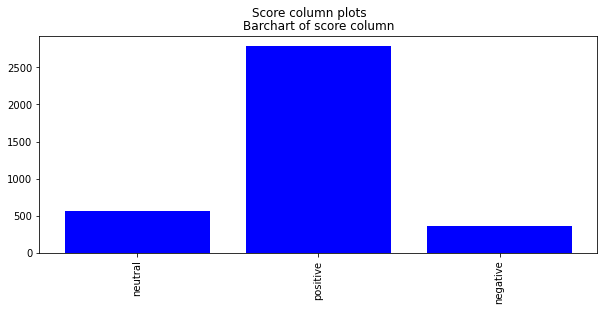

In [ ]:
score = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])
cleanTweet = pd.concat([cleanTweet, score.rename("score")], axis=1)

# Visualize The  score  column using piechart and barchart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['neutral', 'positive', 'negative']
positive = len(cleanTweet[cleanTweet['score'] == "positive"])
negative = len(cleanTweet[cleanTweet['score'] == "negative"])
neutral = len(cleanTweet[cleanTweet['score'] == "neutral"])

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 1, figsize = (10,4))

# Create a bar plot of score column
ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

In [ ]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.score == 'neutral'].index)
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])
cleanTweet['scoremap'] = scoremap

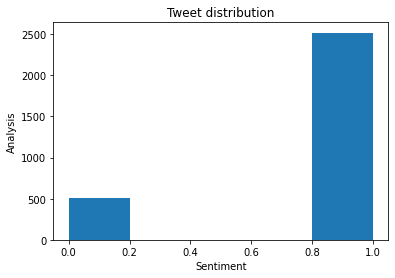

In [ ]:
#Data Exploration

fig=plt.figure()
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(cleanTweet['scoremap'],bins = 5)

#Labels and Tit
plt.title('Tweet distribution')
plt.xlabel('Sentiment')
plt.ylabel('Analysis')
plt.show()

In [ ]:
#Installing library for visualization
!pip3 install pyLDAvis 
!pip3 install spacy
!python3 -m spacy download en_core_web_md 

In [ ]:
import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cleanTweet['original_text'][45:60]

48    17 June 2021: #COVID19 in South Africa 🇿🇦\n\nD...
50    [MB] ☀️ WINNIPEG ☀️ \nAvailable mRNA vaccines!...
51                                                  NaN
52                                                  NaN
53    Karur District - Tomorrow's (19.06.2021) Vacci...
54                                                  NaN
55                                                  NaN
57    Join us in Al Balagh 2nd International Confere...
58                                                  NaN
59    Israel will deliver more than a million doses ...
61                                                  NaN
62                                                  NaN
63    That's great. But there are now *zero* appoint...
64    You can get a #COVID19 vaccine and other vacci...
65    As of June 17th, T&amp;T has administered 201,...
Name: original_text, dtype: object

In [ ]:
#Removing na rows
cleanTweet.dropna(axis = 0, how ='any',inplace=True) 

In [ ]:
cleanTweet['original_text'][45:60]

64    You can get a #COVID19 vaccine and other vacci...
65    As of June 17th, T&amp;T has administered 201,...
66    That's great. But there are now *zero* appoint...
68    Please do your research first if you read or s...
69    13) Similar #DeltaVariant worries from a 🇨🇦 ho...
70    AstraZeneca claims victory over EU in vaccine ...
72    BioCubaFarma says phase 3 clinical trial resul...
77    As per reports, #Israel Prime Minister (#PM) #...
79    As of June 17th, T&amp;T has administered 201,...
80    "Africa is in the midst of a full-blown third ...
82    I’m pleased to welcome the #WeCanDoThis bus to...
83    @AIPAC Will aipac tell the world that Israel h...
84    [Watch] How do vaccines work in our bodies, an...
86    👇👇👇\n\n"People are free to believe that #COVID...
91    We are dying! Ugandans need the world to stand...
Name: original_text, dtype: object

In [ ]:
# Data Cleaning
 
cleanTweet['original_text']=cleanTweet['original_text'].astype(str)
cleanTweet['original_text'] = cleanTweet['original_text'].apply(lambda x: x.lower())
cleanTweet['original_text']= cleanTweet['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [ ]:
# Downloading nltk for stop words
import nltk
nltk.download('stopwords') 

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [ ]:
# remove stopwords from the text
cleanTweet['original_text']=cleanTweet['original_text'].apply(remove_stopwords)

In [ ]:
!python3 -m spacy download en_core_web_md 

In [ ]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
text_list=cleanTweet['original_text'].tolist()
tokenized_reviews = lemmatization(text_list)

In [ ]:
text_list[1]

'dr moeti head africa one best public health experts leaders know desperate request vaccines africa plead germany uk lift patent restrictions urgently transfer technology enable production africa httpstcosogiroihoc'

In [ ]:
tokenized_reviews[1]

['head',
 'good',
 'public',
 'health',
 'expert',
 'leader',
 'desperate',
 'request',
 'vaccine',
 'patent',
 'restriction',
 'transfer',
 'technology',
 'production']

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=500, passes=50,iterations=100)

In [ ]:
lda_model.print_topics()

[(0,
  '0.076*"vaccine" + 0.055*"public" + 0.047*"good" + 0.043*"expert" + 0.042*"leader" + 0.042*"production" + 0.040*"health" + 0.040*"patent" + 0.039*"restriction" + 0.039*"technology"'),
 (1,
  '0.087*"vaccine" + 0.037*"safe" + 0.026*"system" + 0.026*"today" + 0.025*"safety" + 0.024*"way" + 0.024*"amp" + 0.022*"total" + 0.019*"zip" + 0.019*"code"'),
 (2,
  '0.066*"case" + 0.057*"wave" + 0.055*"third" + 0.042*"vaccine" + 0.031*"dose" + 0.028*"health" + 0.027*"coronavirus" + 0.025*"death" + 0.022*"week" + 0.022*"amp"'),
 (3,
  '0.061*"vaccine" + 0.061*"world" + 0.026*"oxygen" + 0.024*"mask" + 0.024*"worker" + 0.022*"covid" + 0.022*"people" + 0.019*"support" + 0.019*"open" + 0.016*"health"'),
 (4,
  '0.214*"vaccine" + 0.035*"dose" + 0.032*"day" + 0.021*"variant" + 0.020*"pandemic" + 0.018*"amp" + 0.015*"more" + 0.014*"effect" + 0.013*"year" + 0.012*"virus"')]

In [ ]:

# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
# pyLDAvis.enable_notebook()
# vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
# vis

import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.092584 -0.206471       1        1  24.055509
4     -0.007720  0.174157       2        1  21.483170
0     -0.268168  0.040393       3        1  18.220367
1      0.169068  0.175633       4        1  18.188306
3      0.199404 -0.183712       5        1  18.052647, topic_info=        Term        Freq       Total Category  logprob  loglift
0       case  308.000000  308.000000  Default  30.0000  30.0000
8       wave  267.000000  267.000000  Default  29.0000  29.0000
7      third  257.000000  257.000000  Default  28.0000  28.0000
134    world  212.000000  212.000000  Default  27.0000  27.0000
17    public  195.000000  195.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
81       new   49.341477  126.061192   Topic5  -4.2611   0.7739
130  patient   45.026941  126.588229   Topic5  -4.3527   0.6782
13    health   56.606196  331.088636   Topic5  -4.1238  -0.0544
93      full   38.675281  109.651088   Topic5  -4.5047   0.6698
65    doctor   35.401813  109.766944   Topic5  -4.5931   0.5803

[241 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
192       3  0.988557    17th
187       2  0.989586     1st
369       5  0.978208     2nd
83        2  0.948241     85k
92        1  0.986858  action
...     ...       ...     ...
134       5  0.996473   world
102       2  0.987002    year
313       4  0.934922   young
61        4  0.993098     zip
62        4  0.995376       📱

[236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -5.0565684494230885

Coherence Score:  0.3255052960916238
